In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Sample Size Explained

## Why Sample Size is Needed

예를 들어서 전국 30대 몸무게의 평균값을 알고 싶을때, 전체 모집단에 대해서 조사를 하기에는 물리적으로 어려움이 따릅니다. <br>
결국 sampling을 해야 하는데, 표본집단의 숫자에 따라서 통계적 유의미성이 달라질 수 있습니다. 

 - 표본집단의 숫자가 **작을** 경우: outliers 또는 anomalies를 포함할 가능성이 있으며, 모집단을 대표하기 부족할 수 있습니다. 
 - 표본집단의 숫자가 **많을** 경우: 최대한 많은 자원과 시간을 들여서 조사를 할 수 있다면 좋지만 비용 문제가 많이 나갈 수 있습니다.
 
따라서 적절한 sample size를 구할 필요성이 있습니다.



## Understand Sample Size

정치적 여론조사, 실험계획에서의 표본석택및 결과분석이 필요한데 표본오차를 구하고 해석하는 방법을 알고 있어야 합니다.

> <span style="color: #777700">허경영 후보 지지율이 설문조사에서 32%의 지지율을 얻었다. <br>
> 이번 조사는 전국 성인남녀 1000명을 대상으로 인터넷 설문조사로 실시되었으며, 신뢰수준 95%에서 표본오차는  ±3.0% 포인트이다</span>

자! 여기서 신뢰수준 95%에서 표본오차 3.0%포인트라는 말의 의미가 무엇인가 입니다<br>

**쉽게 말하면 위와 동일한 설문조사를 100번 실시한다면, <br>
95번은 허경영 후보가 32%에서 ±3.0% 인 29%~35% 사이의 지지율을 얻을 것으로 기대된다는 의미입니다.**



 - <span style="color:red">신뢰수준 (Confidence Level): 표본에 의한 조사 결과의 확실성 정도를 표현하는 것. 일반적으로 0.95, 0.99가 많이 사용됩니다. </span>
 - <span style="color:red">표본오차 (Margin of Error): 위의 신뢰수준 하에서 샘플에 의한 추정이 모집단의 측정치와 표본오차 범위만큼 차이날수 있다는 것을 의미 합니다.</span>


## Formula

$$ \begin{align} 
\text{necessary sample size} &= \frac{y}{1+(y * \frac{1}{N})} \\
y &= \frac{Z^2_{\alpha/2} \cdot p(1-p)}{e^2} \\
\end{align} $$ 

- $ Z_{\alpha/2} $ : 신뢰수준에 대응하는 z-score
- $ p $ : 관찰치 (the observed percentage)로서 보통 최대 표본 오차를 구하기 위해서 p=0.5를 사용
- $ e $ : 표본오차 (margin or error, confidence interval) 
- $ N $ : 모집단의 크기 (population size)

# Hot to Calculate 

## Calculate Z-Score from Confidence Level

Z-score는 아래와 같습니다. 

$$  Z = \frac{x-\mu}{\sigma} $$

Z-score는 단순히 평균으로부터 표준편차의 몇배 정도 떨어져 있는지 이며, 그 x축의 값입니다.

이게 중요한게 아니라, 우리가 구하고자 하는것은 표준정규분포 ( $ \mu=0, \sigma=1 $ ) 를 따른다고 가정할때,<br>
**confidence level (신뢰구간. 0.9, 0.95, 0.99 같은 값들) 값으로 Z-Score 를 역으로 알아내는 것 입니다.**<br>
[Z-Table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/z-two-tails.pdf) 에서 Z-score를 알면 P-value를 알아낼수 있는데.. 그의 역이라고 할까.. 


Confidence level로 부터 Z-Score 계산을 구현하는 방법중에 쉬운 방법은 norm.ppf 를 사용하는 것입니다.<br>
norm.ppf(p) 를 사용하면 되고, p값은 확률값 CDF값으로서 몇 퍼센트의 면적을 의미합니다.<br>
참고로 norm.cdf(x)는 가장 왼쪽에서부터의 가로축 x까지의 면적입니다.

In [138]:
from scipy.stats import norm

def cal_zscore(confidence_level):
    return norm.ppf(1-(1-confidence_level)/2, loc=0, scale=1)

def cal_cdf(z_score):
    # norm.cdf는 가장 왼쪽에서부터의 누적 확률을 계산합니다. 
    return norm.cdf(z_score) - norm.cdf(-z_score)

for cl in [0, 0.1, 0.5, 0.9, 0.95, 0.99]:
    z_score = cal_zscore(cl)
    print(f'confidence level {cl:4.2f} -> z-score {z_score:5.3f} | cdf:{cal_cdf(z_score):.2f}')

confidence level 0.00 -> z-score 0.000 | cdf:0.00
confidence level 0.10 -> z-score 0.126 | cdf:0.10
confidence level 0.50 -> z-score 0.674 | cdf:0.50
confidence level 0.90 -> z-score 1.645 | cdf:0.90
confidence level 0.95 -> z-score 1.960 | cdf:0.95
confidence level 0.99 -> z-score 2.576 | cdf:0.99


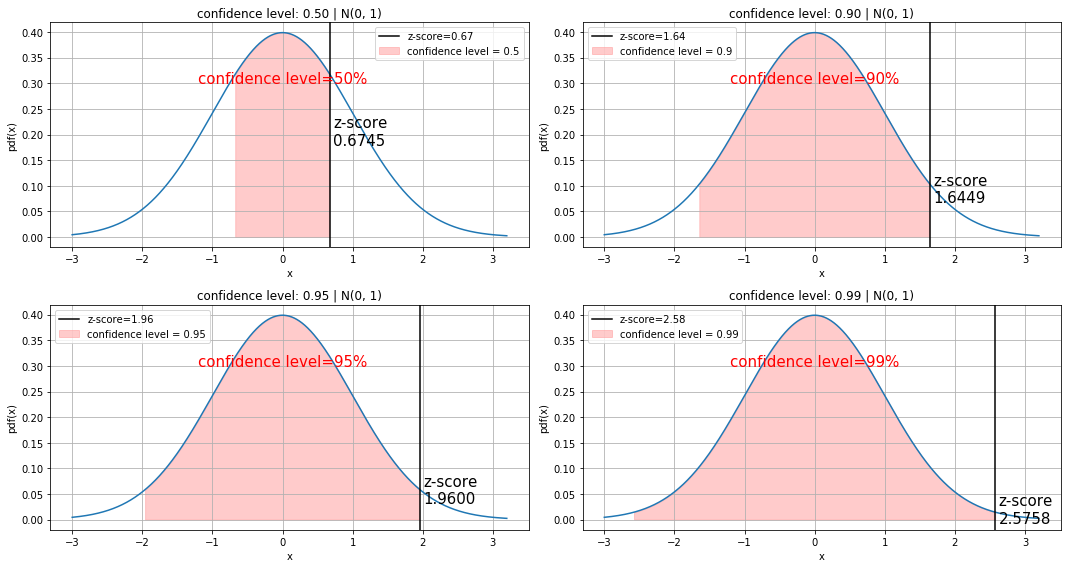

In [101]:
def visualize_z_scores():
    confidence_levels = [0.5, 0.9, 0.95, 0.99]
    
    fig, plots = plt.subplots(2, len(confidence_levels)//2, figsize=(15, 8))
    fig.set_tight_layout(True)
    plots = plots.reshape(-1)
    for ax, cl in zip(plots, confidence_levels):
        y_scale = norm.pdf(norm.ppf(cl))
        x = np.arange(-3, 3.2, 0.001)
        ax.plot(x, norm.pdf(x, loc=0, scale=1))
        ax.set_title(f"confidence level: {cl:.2f} | N(0, 1)")
        ax.set_xlabel('x')
        ax.set_ylabel('pdf(x)')
        ax.grid(True)
        
        # Calculate Z-Score
        z_score = cal_zscore(cl)
        cl_x = np.arange(-z_score, z_score, 0.01)
        ax.fill_between(cl_x, norm.pdf(cl_x), alpha=0.5, color='#ff9999', 
                       label=f'confidence level = {cl}')
        
        ax.text(-1.2, .3, f"confidence level={int(cl*100)}%", fontsize=15, color='r')
        ax.text(z_score+0.05, y_scale/2-0.02, f"z-score\n{z_score:.4f}", fontsize=15)
        ax.axvline(z_score, 0, 1, label=f'z-score={z_score:.2f}', color='black')
        ax.legend()

visualize_z_scores()

## Calculate Sample Size


In [145]:
from scipy.stats import norm

def cal_zscore(confidence_level):
    return norm.ppf(1-(1-confidence_level)/2, loc=0, scale=1)

def calculate_sample_size(p_n:int, cl:float, e:float):
    """
    :param p_n: population size 모집단의 갯수 ex. 10000
    :param cl: confidence level 신뢰수준 ex. 0.95, 0.99
    :param e: margin of error 표본 오차 ex. 0.03
    """
    assert 0 < cl < 1
    assert 0 < e < 1
    
    p_n = int(p_n)
    y = cal_zscore(cl)**2 * 0.5*(1-0.5)/(0.05**2)
    return y/(1 + (y* 1/p_n))


sample_size = int(calculate_sample_size(10000, 0.95, 0.03))

print(f'1000명의 설문조사이며, 신뢰수준 95%에서 표본오차 ±3.0%일때 필요한 설문조사 인원은 {sample_size}명 입니다')

1000명의 설문조사이며, 신뢰수준 95%에서 표본오차 ±3.0%일때 필요한 설문조사 인원은 369명 입니다
